<a href="https://colab.research.google.com/github/magno12345/UPSO/blob/main/TP_FINAL_SVM_ESTACIONAMIENTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Enunciado

Un supermercado quiere diseñar un sistema para indicarle a sus clientes que tan lleno está
el estacionamiento en su página web. El programador al que contrató le pidió que colocara
una cámara que tome fotos del estacionamiento regularmente, y al cabo de un tiempo se
formuló un dataset, con 300 imágenes del estacionamiento bastante lleno, y otras 300 del
estacionamiento bastante vacío, con distintas condiciones de clima y hora del día.

dataset:[carpetas de imagenes](https://drive.google.com/drive/folders/1RG-ORf8ulHWy5XuicyetXwyrrmxrEW7a?usp=drive_link)

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

Cargo las imagenes y les agrego etiquetas en el ciclo for.

In [3]:
dir = "/content/drive/MyDrive/SVM/autos_todos"

clases=["muchosautos","pocosautos"]

data =[]

for clase in clases:
  path = os.path.join(dir,clase)
  etiqueta = clases.index(clase)

  for img in os.listdir(path):
    imgpath = os.path.join(path,img)
    car_img = cv2.imread(imgpath,0)
    car_img = cv2.resize(car_img,(50,50))
    image = np.array(car_img).flatten()

    data.append([image,etiqueta])

# Imprimo cómo quedaron conformadas las dos clases
for i, clase in enumerate(clases):
    count = sum(1 for label in data if label[1] == i)
    print(f"Clase {clase}: {count} ejemplos")

Clase muchosautos: 300 ejemplos
Clase pocosautos: 309 ejemplos


Las imagenes la paso a escala de grises para facilitar el procesamiento y el rendimiento computacional ya que reduzco las imagenes a un solo canal de color ,las imágenes en color suelen tener tres canales (rojo, verde y azul en el modelo RGB), lo que aumenta la dimensionalidad de los datos.

Puntaje : 0.9781420765027322
Prediccion es: Estacionamiento Lleno


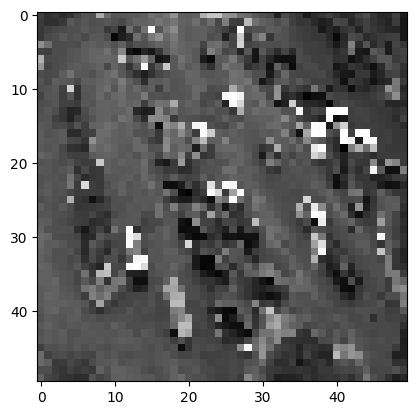

In [11]:
import pickle

pick_in = open("/content/drive/MyDrive/DATASET ESTACIONAMIENTO/dataset_estacionamiento.pickle","rb")
data = pickle.load(pick_in)

features = []
labels = []

for feature,label in data:
  features.append(feature)
  labels.append(label)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.3,shuffle=True)

from sklearn.svm import SVC

clf = SVC(C=1,kernel="linear",gamma="auto")
clf.fit(x_train,y_train)

prediccion = clf.predict(x_test)
puntaje = clf.score(x_test,y_test)
clases=["Estacionamiento Lleno","Estacionamiento Vacio"]


print("Puntaje :",puntaje)
print("Prediccion es:",clases[prediccion[0]])


park = x_test[0].reshape(50,50)
plt.imshow(park,cmap="gray")
plt.show()

busco el mejor kernel

In [5]:
from sklearn.metrics import accuracy_score
kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:

    model = SVC(kernel=kernel,C=10,gamma=1)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print("Accuracy using {}:".format(kernel), accuracy_score(pred, y_test))

Accuracy using linear: 0.9726775956284153
Accuracy using rbf: 0.5081967213114754
Accuracy using poly: 0.9781420765027322


busco los mejores hiperparametros

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': [ 'rbf',"poly"], 'C': [0.1, 1,2,3,4,10], 'gamma': [0.1, 1,2,3,4,10]}
svc = SVC()
clf1 = RandomizedSearchCV(svc, parameters, scoring='f1_macro')
clf1.fit(x_train, y_train)

print("Mejores parámetros:", clf1.best_params_)

print("Mejor score:", clf1.best_score_)

Mejores parámetros: {'kernel': 'poly', 'gamma': 0.1, 'C': 0.1}
Mejor score: 0.9788111393683447


Matriz de confusion.

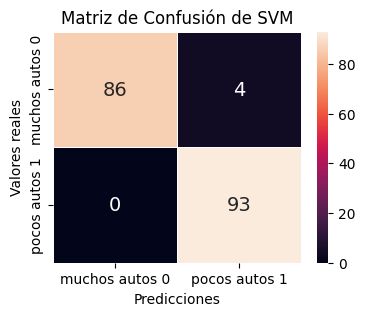

In [7]:
#matriz de confusion de SVM
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(x_test)
c = confusion_matrix(y_test,y_pred)


def matriz_confusion(matrix,nombre_model=""):
    # Convierte la matriz de confusión a una lista de listas de cadenas
    confusion_matrix_str = [[str(value) for value in row] for row in matrix]

    # Crea un gráfico de matriz de confusión con Seaborn
    plt.figure(figsize=(4, 3))
    sns.heatmap(matrix, annot=True, fmt='g', linewidths=0.5, annot_kws={"size": 14}, xticklabels=['muchos autos 0', 'pocos autos 1'], yticklabels=['muchos autos 0', 'pocos autos 1'])
    plt.xlabel('Predicciones')
    plt.ylabel('Valores reales')
    plt.title(f'Matriz de Confusión de {nombre_model}')
    plt.show()

matriz_confusion(c,"SVM")

Validacion cruzada

In [8]:
# Importamos la función de entrenamiento y validación cruzada
from sklearn.model_selection import cross_val_score

# Realizamos validación cruzada con 10 folds
nScores = cross_val_score(clf, features, labels, cv=10)

# Calculamos la media de los puntajes de validación cruzada
mean_score = nScores.mean()
print(f'Media de puntajes de validación cruzada: {mean_score}')


Media de puntajes de validación cruzada: 0.9390983606557377
